In [83]:
#IMPORTING SHIT
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from copy import deepcopy
from math import ceil, exp, atan, pi, cos, sin

import scipy
import scipy.signal
from scipy import signal
from scipy.io.wavfile import write
from scipy.linalg import hankel
from scipy.linalg import toeplitz
from scipy.signal import lfilter

from numpy.linalg import pinv

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

import matplotlib.pyplot as plt
import numpy as np

import wave

import colorednoise as cn
#from matplotlib import pylab as plt

import sounddevice as sd
from scipy.io.wavfile import write

from tqdm import tqdm
import time

import pathlib
from util.util import load_data_json, to_db
from expr.analysis import load_analysis

import hr.pam as pam
import hr.process as pierre

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


> ## Signal Synthesis

> Simple Noisless Signal with Two Sinusoids

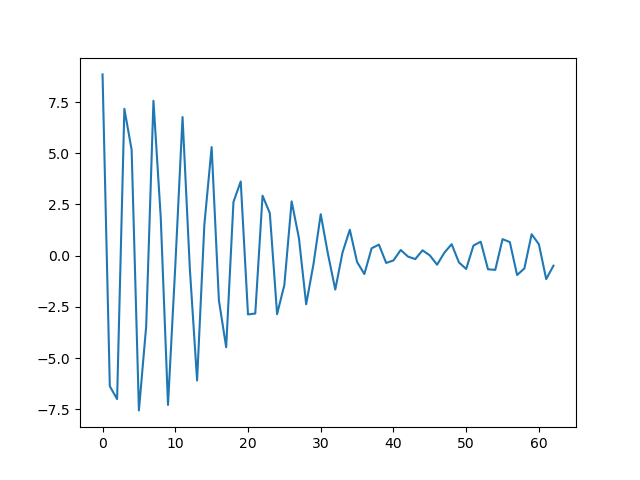

In [34]:
N_synth = 63

f0_synth = 1/4
f_synth = np.array([f0_synth, f0_synth+(1/N_synth)])

a_synth = np.array([1, 10])

delta_synth = np.array([0, -0.05])

phi_synth = np.array([1.5, 0.5])

# synthesised signal
x_synth = pam.synthesize(N_synth, delta_synth, f_synth, a_synth, phi_synth)

plt.plot(np.real(x_synth[0]))

#np.max(np.real(x_synth))

> Simple Noisless Signal with One Sinusoid and Vibrato Effect

In [35]:
N_vibr0 = 2**9-1

delta_vibr0 = np.array([0])

f_vibr0 = np.array([0.3])

a_vibr0 = np.array([2])

phi_vibr0 = np.array([0])

vibrato0 = pam.synthesize(N_vibr0, delta_vibr0, f_vibr0, a_vibr0, phi_vibr0, 0.02, 5, 0, 0)

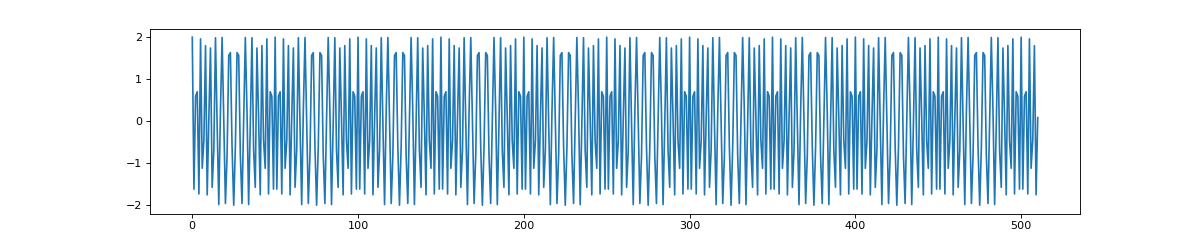

In [36]:
plt.figure(figsize=(15, 3), dpi=80)

plt.plot(np.real(vibrato0[0]))
plt.show()


In [37]:
fs_vibr0 = 1000

sd.play(np.real(vibrato0[0]), fs_vibr0)

print("The length of the signal is", N_vibr0/fs_vibr0, "seconds.")

t = np.linspace(0., N_vibr0/fs_vibr0, fs_vibr0)
amplitude = np.iinfo(np.int16).max
data  = amplitude*np.real(vibrato0[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("vibrato.wav", fs_vibr0, data.astype(np.int16))

The length of the signal is 0.511 seconds.


> Noisless Signal with Eight Sinusoids and vibrato Effect

In [38]:
N_vibr1 = 2**11-1

K_vibr1 = 8

f0_vibr1 = 0.06
f_vibr1 = f0_vibr1*np.arange(1,K_vibr1+1)

a_vibr1 = np.array([0.00807193, 0.09748246, 0.02404544, 0.04275309, 0.02482811,
       0.08778044, 0.00470351, 0.03118916])

delta_vibr1 = -0.0001*np.random.rand(K_vibr1)

phi_vibr1 = np.array([1.76348603, 1.20411769, 0.76158339, 1.35157899, 0.36247392,
       1.44086579, 1.73647764, 1.98131046])

vibrato1 = pam.synthesize(N_vibr1, delta_vibr1, f_vibr1, a_vibr1, phi_vibr1, 0.003, 10, 0, 0)

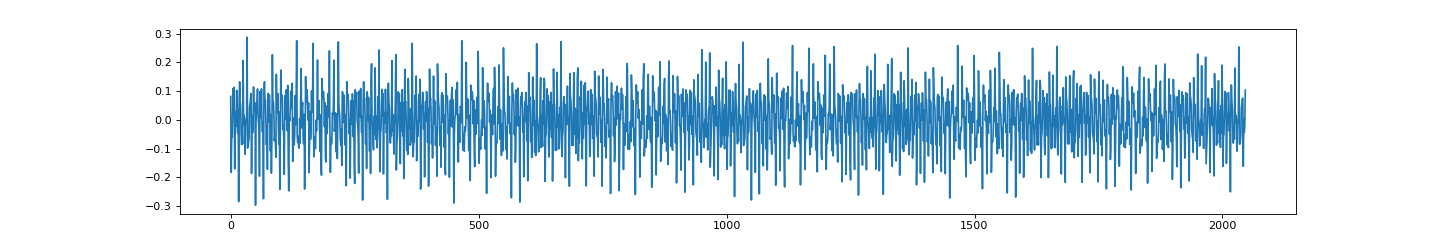

In [39]:
plt.figure(figsize=(18, 3), dpi=80)

plt.plot(np.real(vibrato1[0]))

plt.show()

In [40]:
fs_vibr1 = 1000

sd.play(np.real(vibrato1[0]), fs_vibr1)

print("The length of the signal is", N_vibr1/fs_vibr1, "seconds.")

t = np.linspace(0., N_vibr0/fs_vibr1, fs_vibr1)
amplitude = np.iinfo(np.int16).max
data  = amplitude*np.real(vibrato1[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("vibrato.wav", fs_vibr1, data.astype(np.int16))

The length of the signal is 2.047 seconds.


> Noisless Signal with Eight Sinusoids (Pink Noise and SNR = 39 dB)

SNR = 38.74052811073821 dB


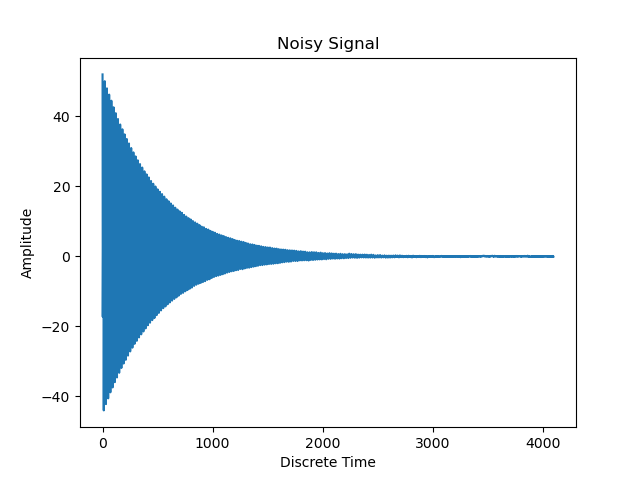

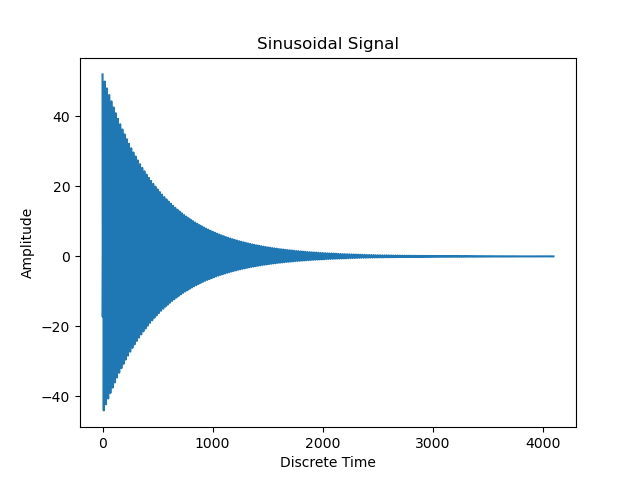

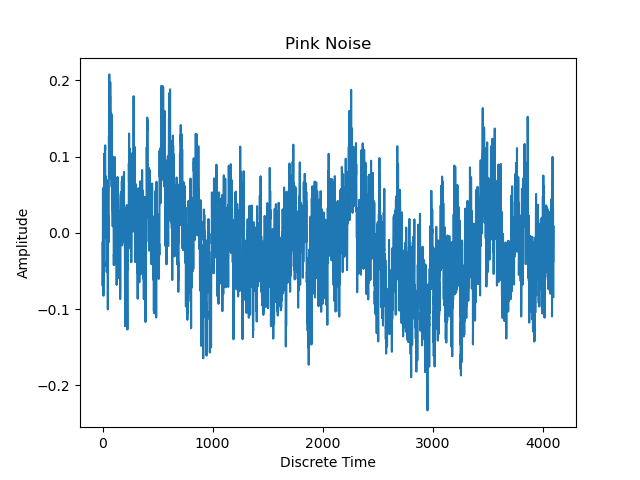

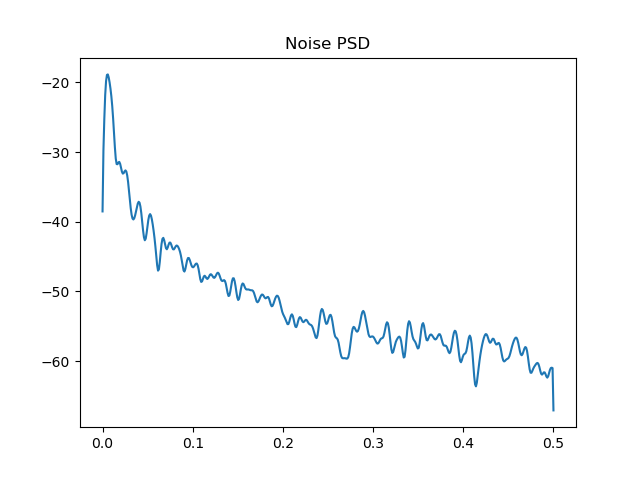

In [41]:
N_synth2 = 2**12-1

K_synth2 = 8

#f_synth2 = 0.48*np.random.rand(0,K_synth2) + 0.1*np.ones(K_synth2) 

#a_synth2 = 19*np.random.rand(0,K_synth2) + np.ones(K_synth2) 

f_synth2 = 0.05*np.arange(1,K_synth2+1)

a_synth2 = np.array([18, 15, 13, 11, 8, 5, 4, 3])

delta_synth2 = -0.002*np.ones([K_synth2])

phi_synth2 = np.array([0, 1.5, 0, 1, 0, 1.5, 0, 1])

# synthesised signal
x_synth2 = pam.synthesize(N_synth2, delta_synth2, f_synth2, a_synth2, phi_synth2, 0, 0, 2, 70)

print("SNR =", x_synth2[3], "dB")

plt.figure()
plt.plot(np.real(x_synth2[0]))
plt.title('Noisy Signal')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
#plt.xlim(250,3000)
plt.show()

plt.figure()
plt.plot(np.real(x_synth2[1]))
plt.title('Sinusoidal Signal')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
#plt.xlim(250,3000)
plt.show()

plt.figure()
plt.plot(x_synth2[2])
plt.title('Pink Noise')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
plt.show()


plt.figure()
plt.title("Noise PSD")
freq_synth2, PSD_noise_synth2 = signal.welch(x_synth2[2], nfft=1024)
plt.plot(freq_synth2, 20*np.log10(PSD_noise_synth2))
plt.show()


In [42]:
# play signal 
fs_synth2 = 1000

sd.play(np.real(x_synth2[0]), fs_synth2)

print("The length of the signal is", N_synth2/fs_synth2, "seconds.")

t = np.linspace(0., N_synth2/fs_synth2, fs_synth2)
amplitude = 0.01*np.iinfo(np.int16).max
data  = amplitude*np.real(x_synth2[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("noisy2.wav", fs_synth2, data.astype(np.int16))

The length of the signal is 4.095 seconds.


> ## Loading Experimental Data

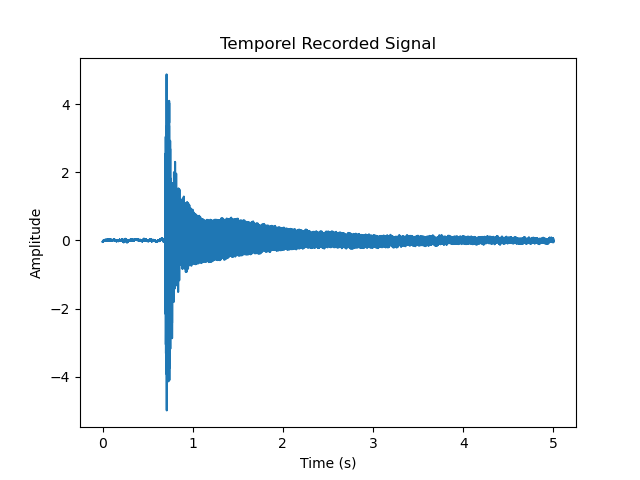

In [43]:
# Loading config from config files
conf_dir = pathlib.Path('./config/expr/')
data_dir = pathlib.Path('../data/expr/2022_01_27')
#
log_path = conf_dir / 'log_config.json'
conf_path = conf_dir / 'analysis_config.json'
data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_18cmFromBridge_1.mat'

log = load_data_json(log_path)
conf = load_data_json(conf_path)
expr_data = load_analysis(data_path, conf)

# see expr/util.py for details on what's inside expr_data
mic = expr_data["temporal"]["mic"]["whole"]
times = expr_data["times"]["whole"]

plt.figure()
plt.title("Temporel Recorded Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(times, mic)
plt.show()

In [44]:
# play signal
fs_mic = int(1/(times[1]-times[0]))

sd.play(mic[35000:], fs_mic)

fs_band

51200

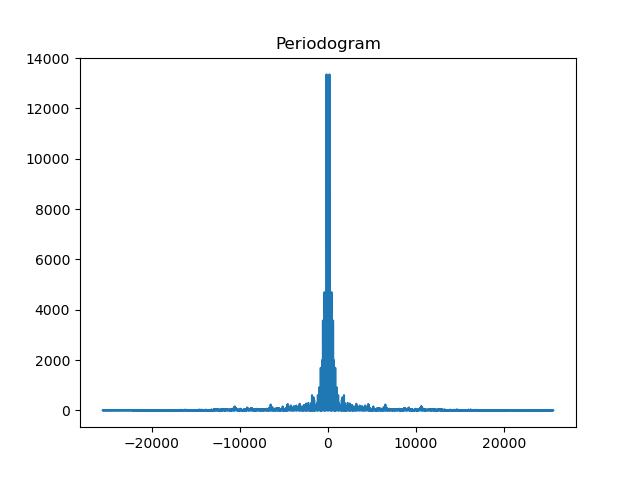

In [45]:
fft = np.fft.fft(band[35000:])
freqs = np.fft.fftfreq(mic[35000:].size)
plt.figure()
plt.plot(freqs*fs_mic, np.abs(fft))
plt.title('Periodogram')
plt.show()

> ## Signal Treatment

> Constructing the Filter Bank

10


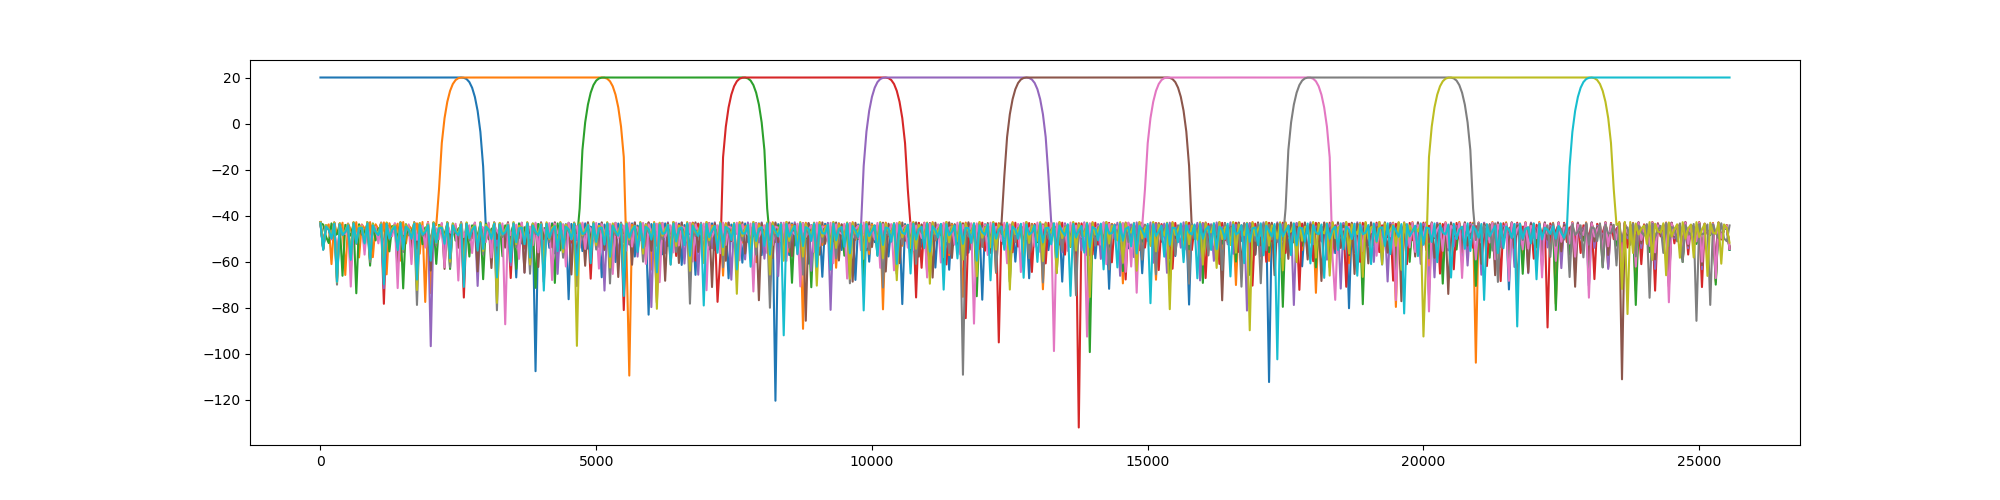

In [46]:
bank_coeffs = pam.filter_bank(10, fs_mic, 425, 425)

print(len(bank_coeffs))

plt.figure(figsize=[20,5])

for i in range(len(bank_coeffs)):
    
    freqs, amps = signal.freqz(bank_coeffs[i], [1])
    plt.plot(0.5*fs_mic*freqs/np.pi, 20*np.log10(np.abs(amps)))
    

plt.show()

> Filtering Signal with the Filter Bank and Decimation

In [47]:
num_bands = len(bank_coeffs)
mic_bands = []

for i in range(num_bands):
    filtered = signal.lfilter(bank_coeffs[i], [1], mic[35000:])
    decimated = pam.decimate(filtered, num_bands)
    mic_bands.append(decimated)
    

> PSD of Signal by Sub-bands

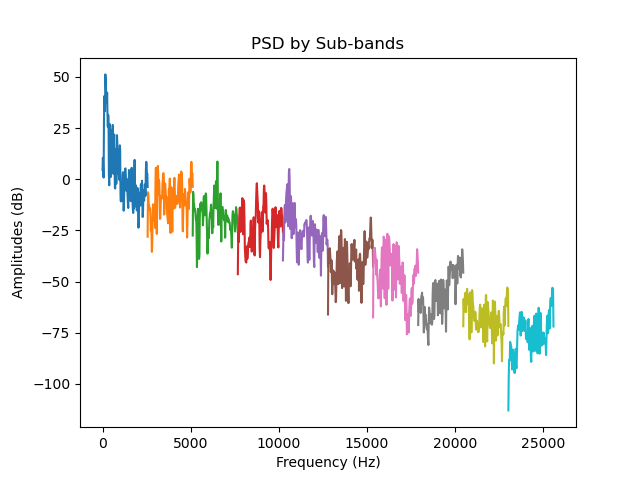

In [48]:
fs_bands = fs_mic//num_bands
plt.figure()
for i in range(num_bands):
    
    freqs, PSD = signal.welch(mic_bands[i])
    plt.plot(fs_bands*freqs+i*fs_bands/2, 20*np.log10(PSD))
    plt.title('PSD by Sub-bands')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitudes (dB)')

    #freqso, amps = signal.freqz(bank_coeffs[i], [1])
    #plt.plot(0.5*fs_mic*freqso/np.pi, 20*np.log10(np.abs(amps)))
plt.show()

#for i in range(num_bands):    
#    fft = np.fft.fft(mic_bands[i])
#    freqs = np.fft.fftfreq(mic_bands[i].size)
#    plt.figure()
#    plt.plot(freqs*fs_bands, np.abs(fft))
#    plt.show()

In [49]:
# play one sub-band
sd.play(mic_bands[0], fs_bands)

> #### Noise Whitening

> Testing with Synthetic Signal

[0.00314479 0.00202118 0.00112552 ... 0.00069255 0.00112552 0.00202118]
The minimum value for the smoothing order is 131.136


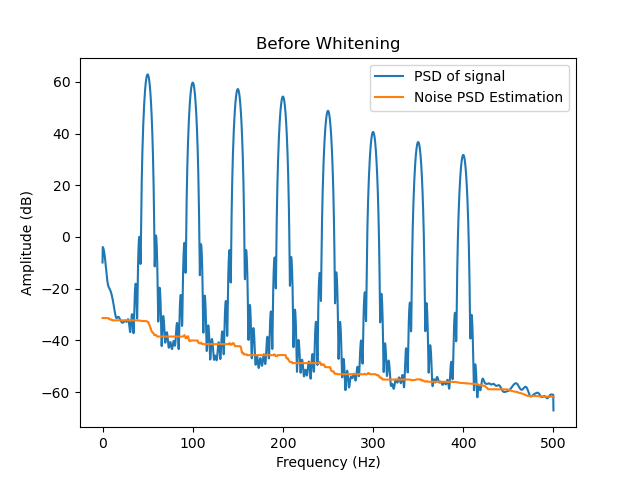

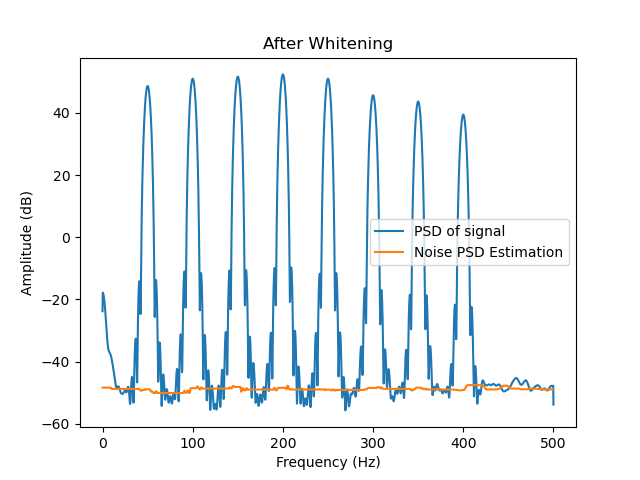

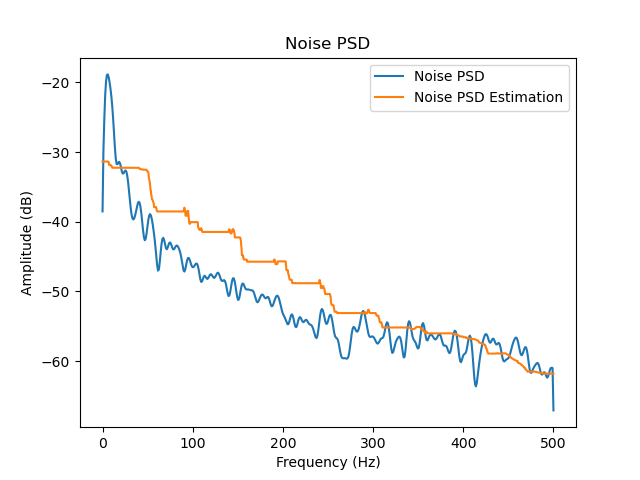

In [50]:
x_white2, freq2_norm, PSD_x2, PSD_noise2, PSD_x_white2, PSD_noise_white2 = pam.whiten(np.real(x_synth2[0]), 200, 15)

print('The minimum value for the smoothing order is', 4*0.016*len(freq2_norm))

freq2 = fs_synth2*freq2_norm

plt.figure()
plt.title('Before Whitening')
plt.plot(freq2, 20*np.log10((PSD_x2)), label = 'PSD of signal')
plt.plot(freq2, 20*np.log10((PSD_noise2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()

plt.figure()
plt.title('After Whitening')
plt.plot(freq2, 20*np.log10((PSD_x_white2)), label = 'PSD of signal')
plt.plot(freq2, 20*np.log10((PSD_noise_white2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()


plt.figure()
plt.title("Noise PSD")
plt.plot(fs_synth2*freq_synth2, 20*np.log10(PSD_noise_synth2), label = 'Noise PSD')
plt.plot(freq2, 20*np.log10((PSD_noise2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()

> Whitening the Experimental Signal (before filter bank)

[0.02503299 0.02137971 0.01413861 ... 0.00860933 0.01413861 0.02137971]
The smoothing order must be at least 2097.216


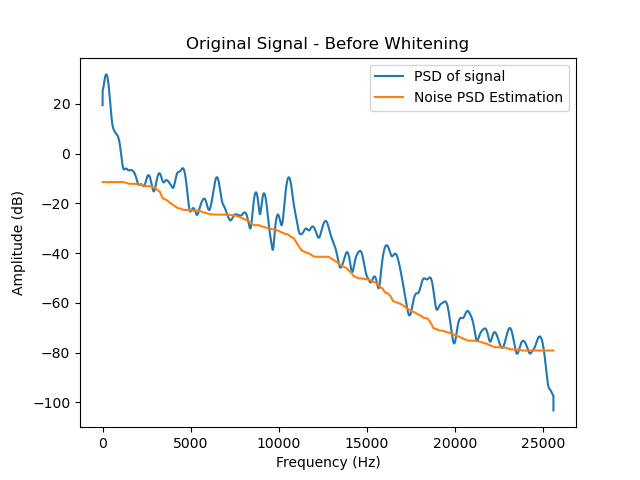

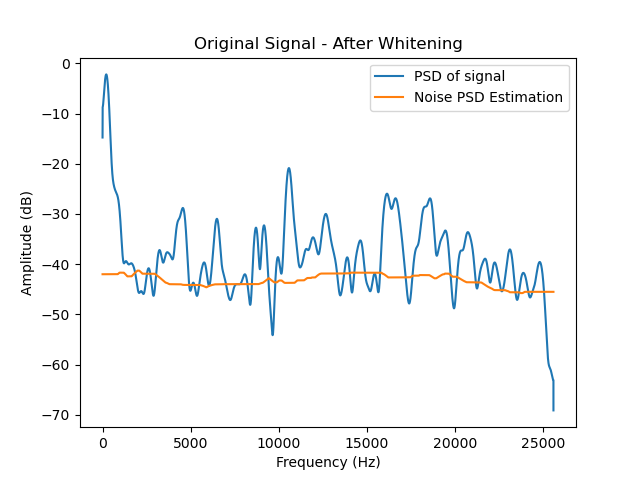

In [74]:
mic_white, freq_mic, PSD_mic, PSD_noise_mic, PSD_mic_white, PSD_noise_mic_white = pam.whiten(mic[35000:70000], 10000, 15)

print('The smoothing order must be at least', 4*0.016*len(freq_mic))

freq_mic *= fs_mic

plt.figure()
plt.title('Original Signal - Before Whitening')
plt.plot(freq_mic, 20*np.log10((PSD_mic)), label = 'PSD of signal')
plt.plot(freq_mic, 20*np.log10((PSD_noise_mic)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,500)
plt.legend()
plt.show()

plt.figure()
plt.title('Original Signal - After Whitening')
plt.plot(freq_mic, 20*np.log10((PSD_mic_white)), label = 'PSD of signal')
plt.plot(freq_mic, 20*np.log10((PSD_noise_mic_white)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,1000)
plt.legend()
plt.show()

> Whitening the First Band

[0.46798218 0.29116491 0.18675817 ... 0.09372069 0.18675817 0.29116491]
The smoothing order must be at least 1048.64


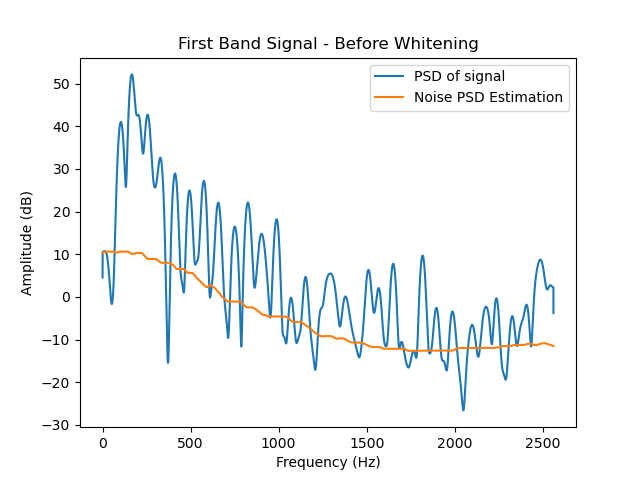

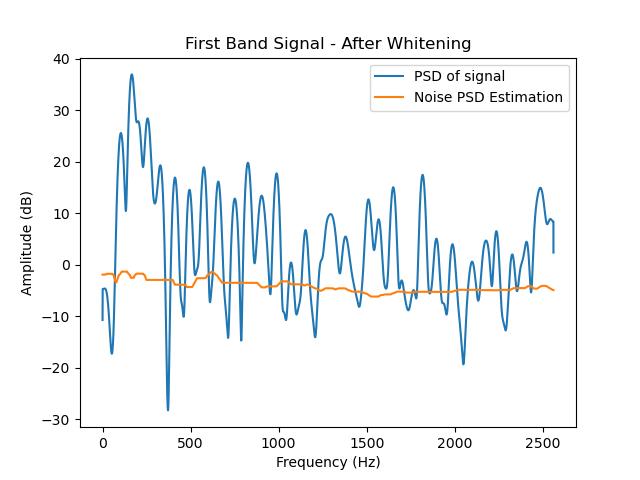

In [78]:
band0_white, freq_band0, PSD_band0, PSD_noise_band0, PSD_band0_white, PSD_noise_band0_white = pam.whiten(mic_bands[0], 7000, 15)

print('The smoothing order must be at least', 4*0.016*len(freq_band0))

freq_band0 *= fs_bands

plt.figure()
plt.title('First Band Signal - Before Whitening')
plt.plot(freq_band0, 20*np.log10((PSD_band0)), label = 'PSD of signal')
plt.plot(freq_band0, 20*np.log10((PSD_noise_band0)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,500)
plt.legend()
plt.show()

plt.figure()
plt.title('First Band Signal - After Whitening')
plt.plot(freq_band0, 20*np.log10((PSD_band0_white)), label = 'PSD of signal')
plt.plot(freq_band0, 20*np.log10((PSD_noise_band0_white)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,1000)
plt.legend()
plt.show()

> ## HR Analysis

> Testing EPRIT and LeastSquares

In [52]:
delta_an, f_an = pam.esprit(x_synth[0], 32, 2)

alpha_an, a_an, phi_an = pam.least_squares(x_synth[0], delta_an, f_an)

#EdB_an = Energy(x_synth, delta_an, a_an)

print(delta_an, f_an, alpha_an, a_an, phi_an)#, EdB_an)


[-5.00000000e-02 -1.11022302e-16] [0.26587302 0.25      ] [8.77582562+4.79425539j 0.0707372 +0.99749499j] [10.  1.] [0.5 1.5]


> Testing ESPRIT by Blocks (with a vibrato)

In [53]:
delta00, f00, alpha00, a00, phi00 = pam.esprit_blocks(vibrato0[0][:200], 0.035, 0.020, fs_vibr0, 32, 1)

print('- Damping factors:\n', delta00, '\n- Frequencies:\n', f00*fs_vibr0, '\n- Complex Amplitudes:\n', alpha00, '\n- Amplitudes:\n', a00, '\n- Intial Phases:\n', phi00 )

- Damping factors:
 [[-0.06462156]
 [-0.1059914 ]
 [-0.07731631]
 [-0.04093937]
 [-0.03264625]
 [-0.06462156]
 [-0.1059914 ]
 [-0.07731631]] 
- Frequencies:
 [[263.86192528]
 [295.01165819]
 [340.46558463]
 [251.49205179]
 [348.0143032 ]
 [263.86192528]
 [295.01165819]
 [340.46558463]] 
- Complex Amplitudes:
 [[ 0.48384274+0.86758021j]
 [-0.77708497+0.96585895j]
 [-0.39036651+0.70820166j]
 [ 0.70678423-1.15950977j]
 [ 0.6792423 +0.05645188j]
 [ 0.48384274+0.86758021j]
 [-0.77708497+0.96585895j]
 [-0.39036651+0.70820166j]] 
- Amplitudes:
 [[0.99337768]
 [1.23965502]
 [0.80866285]
 [1.35794214]
 [0.68158413]
 [0.99337768]
 [1.23965502]
 [0.80866285]] 
- Intial Phases:
 [[ 1.06206657]
 [ 2.24830748]
 [ 2.0745666 ]
 [-1.02338117]
 [ 0.08291951]
 [ 1.06206657]
 [ 2.24830748]
 [ 2.0745666 ]]


In [54]:
delta00, f00, alpha00, a00, phi00 = pam.esprit_blocks(vibrato1[0][:200], 0.035, 0.020, fs_vibr1, 32, 8)

print('- Damping factors:\n', delta00, '\n- Frequencies:\n', f00*fs_vibr1, '\n- Complex Amplitudes:\n', alpha00, '\n- Amplitudes:\n', a00, '\n- Intial Phases:\n', phi00 )

- Damping factors:
 [[-1.98637946e-03 -6.80337761e-02 -4.90659555e-03 -2.22871142e-02
  -1.64868738e+00 -1.46710666e+00 -1.12999860e+00 -8.25614315e-01]
 [ 8.63003400e-03 -2.92019112e-02 -8.48621849e-03 -1.92838248e-02
  -1.09150108e+00 -1.87531440e+00 -2.05728747e+00 -1.02686308e+00]
 [ 5.77586256e-03 -8.55639356e-02 -1.84070795e-02 -2.61362442e-02
  -1.20273426e+00 -8.96295904e-01 -7.03275408e-01 -1.89768662e+00]
 [-6.32544979e-03 -8.97465684e-02 -3.49796157e-02 -3.94910408e-02
  -1.34225458e+00 -9.26638200e-01 -1.45082827e+00 -1.29799176e+00]
 [-6.26809739e-03 -8.39487683e-02 -1.58091073e-02 -2.04238935e-02
  -7.86808573e-01 -6.24247004e-01 -7.37173269e-01 -1.64624801e+00]
 [-2.94820271e-02 -9.52111120e-03  5.86574109e-03 -8.92476137e-02
  -7.84859668e-01 -1.32255120e+00 -1.55636851e+00 -2.22779915e+00]
 [ 1.10651041e-02 -1.77879905e-02 -8.68287221e-03 -2.18102950e-02
  -6.85497309e-01 -1.13984934e+00 -3.00385829e+00 -1.10170568e+00]
 [ 3.72369644e-03 -6.97959843e-02 -1.83535229e-02

> HR Analysis for Experimental Signal

In [66]:
delta_mic, f_mic, alpha_mic, a_mic, phi_mic = pam.esprit_blocks(mic_white, 0.030, 0.020, fs_mic, 32, 30)

print( 'Frequencies:\n', f_mic*fs_mic, '\n\n- Damping factors:\n', delta_mic, '\n\n- Complex Amplitudes:\n', alpha_mic, '\n\n- Amplitudes:\n', a_mic, '\n\n- Intial Phases:\n', phi_mic )

Frequencies:
 [[   312.16026659   -312.16026659   4245.08159535  -4245.08159535
    5812.52444295  -5812.52444295   7448.17033944  -7448.17033944
    9023.81265266  -9023.81265266  10608.35050737 -10608.35050737
   12216.41707734 -12216.41707734  13756.93845539 -13756.93845539
   15466.78886071 -15466.78886071  16590.52632122 -16590.52632122
   18422.3568479  -18422.3568479   24360.39126277 -24360.39126277
   22856.92825277 -22856.92825277  21244.16242749 -21244.16242749
   19699.01216675 -19699.01216675]
 [ 22907.75719476 -22907.75719476  21232.48046224 -21232.48046224
   19825.81874981 -19825.81874981  18627.69539926 -18627.69539926
   16470.72730735 -16470.72730735  15062.89907849 -15062.89907849
   13277.32574552 -13277.32574552  11942.89304487 -11942.89304487
   10566.57400239 -10566.57400239    279.42746719   -279.42746719
    2312.08482976  -2312.08482976   4155.30219733  -4155.30219733
    8901.06747154  -8901.06747154   5607.99823503  -5607.99823503
    6834.83334129  -6834.83

In [86]:
band0_white_n = 64

band0_white_order = pierre.Ester.estimate_esm_ordre(band0_white, band0_white_n, band0_white_n//2)

band0_white_order

4

In [87]:
delta_band0, freq_band0, alpha_band0, amp_band0, phi_band0 = pam.esprit_blocks(band0_white, 0.030, 0.020, fs_bands, band0_white_n, band0_white_order)

print( 'Frequencies:\n', freq_band0*fs_bands, '\n\n- Damping factors:\n', delta_band0, '\n\n- Complex Amplitudes:\n', alpha_band0, '\n\n- Amplitudes:\n', amp_band0, '\n\n- Intial Phases:\n', phi_band0 )

Frequencies:
 [[  191.56079474  -191.56079474  2560.          2560.        ]
 [  116.04275978  -116.04275978  1324.39495323 -1324.39495323]
 [  193.47268108  -193.47268108   107.06744182  -107.06744182]
 [  171.75517162  -171.75517162   252.06615209  -252.06615209]
 [  252.71598954  -252.71598954   155.0669168   -155.0669168 ]
 [  251.67672277  -251.67672277   152.87644688  -152.87644688]
 [  251.27263144  -251.27263144   155.27556679  -155.27556679]
 [  253.00191006  -253.00191006   165.53312934  -165.53312934]
 [  164.91342084  -164.91342084  2560.             0.        ]
 [  164.32185604  -164.32185604  1135.23159709 -1135.23159709]
 [  165.59621311  -165.59621311   865.12494177  -865.12494177]
 [  165.85599476  -165.85599476   722.49555198  -722.49555198]
 [  165.02732485  -165.02732485   240.2579716   -240.2579716 ]
 [  164.89904425  -164.89904425   399.21893719  -399.21893719]
 [  163.93648953  -163.93648953   562.78168365  -562.78168365]
 [  164.39200612  -164.39200612   733.588

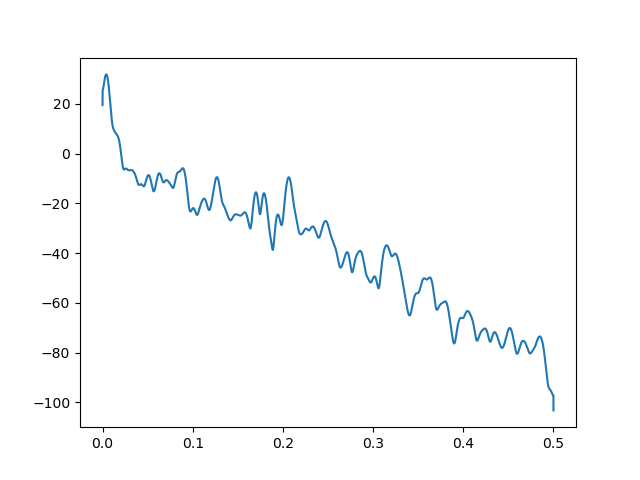

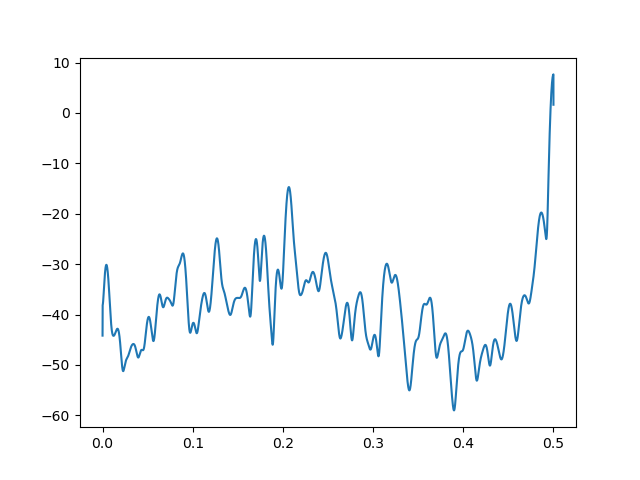

In [30]:
mic_pre, freq_pre, PSD_mic, PSD_mic_pre = pam.preemphasize(mic[35000:70000])

plt.figure()
plt.plot(freq_pre, 20*np.log10((PSD_mic)), label = 'PSD of signal')
plt.show()

plt.figure()
plt.plot(freq_pre, 20*np.log10((PSD_mic_pre)), label = 'PSD of signal')
plt.show()

In [5]:
def Adaptive(x : np.ndarray, n : int, r : float, fe : float, beta: float):
    # n : number of lines in W
    # r : estimation by ESTER of the order
    # # n>r
    # fe: sampling frequency
    #  0 < β < 1 is the forgetting factor

    # computation of W(0), Z(0)
    W0 = np.zeros(n, r)
    W0[:r, :] = np.identity(r)
    W0[r:, :] = 0
    Z0 = np.identity(r)
    
    # time step
    NbEch = len(x)
    t = (np.arange(0, NbEch)/fe)
    W = []
    W.append(W0)
    # W = np.zeros((1, t))
    # W[0] = W0
    

    Z = []
    Z.append(Z0)
    #Z = np.zeros((1, t))
    #Z[0] = Z0

    psi = []
    Phi = []    # the list of Φ(t) 
    eigenvalues = []

    #e = np.zeros((1, t))   #e(t) , not sure about the dimension
    phi = np.zeros((1, t)) #Θ(t) , not sure about the dimension
    #e_point = np.zeros((1, t)) #e'(t) , not sure about the dimension

    #matrix dimensions : y(t), h(t), g(t)
    #y = np.zeros((n, r))
    #h = np.zeros((r, r))
    #g = np.zeros((2, r))
  
    for i in t:  #from 0 to t-1
        # PAST main section
        y = W[i].conj().T @ x[i+1]
        h = Z[i] @ y
        g = h / (beta + y.conj().T @ h)

        # API main section
        e = x[i+1] - W[i]@y #e(t)
        phi = (np.identity(r) + np.linalg.norm(e)**2 @ g @g.conj().T)**(-1/2)
        Z[i+1] = 1/beta * phi.conj().T @ (np.identity(r) - g @ y.conj().T)@Z[i] @ np.linalg.inv(phi.conj().T)
        W[i+1] = (W[i] + e[i+1] @ g.conj().T) @ phi[i+1]

        # FAPI main section (constants)
        sigma_sqaure = np.linalg.norm(x[i+1])**2 - np.linalg.norm(y)**2
        tho = sigma_sqaure/ (1 + sigma_sqaure*np.linalg.norm(g)**2 + np.sqrt(1 + sigma_sqaure*np.linalg.norm(g)**2))
        nu = 1 - tho*np.linalg.norm(g)**2

        #vectors
        y_point = nu*y + tho*g
        h_point = Z[i].conj().T @ y_point
        big_sigma = tho/nu * (Z[i]@g - (h_point.conj().T @ g)@ g)
        Z[i+1] = 1/beta * (Z[i] - g @ h_point.conj().T + big_sigma @ g.conj().T) 
        e_point = nu*x[i+1] - W[i] @ y_point
        # update rules
        W[i+1] = W[i] + e_point[i+1] @ g.conj().T
        
        W.append(W[i+1])
        Z.append(Z[i+1])

        #Adaptive computation of the spectral matrix
        W_down = W[i][0:-1, :]
        W_up = W[i][1:, :]
        e_minus = W_down.conj().T @ e_point[1:, ]
        e_plus = W_up.conj().T @ e_point[0:-1, :]
        epoint_plus = e_plus + g @ (e_point[1:, ].conj().T @ e_point[0:-1, :])
        psi = W_down.conj().T @ W_up  #psi[i]

        psi.append(psi)
        psi = psi + e_minus @ g.conj().T  + g @ epoint_plus.conj().T #psi[i+1], update rules for Ψ(t)

        nu = W[i+1][-1, :]            #last row of W(t),
        phi_phi = psi.conj().T @ nu   # ϕ(t)
        big_phi = psi + 1/(1 - np.linalg.norm(nu)**2) * nu @ phi_phi.conj().T  # Φ(t)
        
        Phi.append(big_phi)
        
        D = scipy.linalg.eig(big_phi, left = False, right = False)    # D, eigenvalues of big_phi
        eigenvalues.append(D) 
        # eigenvalues tracking


        
        ### Adaptive computation of the spectral matrix
        return W, eigenvalues  # W is the list [W0 W1 W2 W3......], D is the list of eigenvalue

In [6]:
# Another code for filter bank and decimation (incomplete)

center_freqs = np.arange(100, 3000, 100) # à nous de définir selon le signal
def filter_bank0(sig : np.ndarray, center_freqs : np.ndarray, fe : float):
    #input
       #sig
       #center_freqs : centered frequencies in filter banks
       #fe : sampling frequency


    #filter banks
    #PSD_sig = plt.psd(sig)
    nb_bands = len(center_freqs)
    #crossover_gain = 10**(-3/20) # cross at -3db of gain for the adjacent bands

    #band edges, frequencies
    band_edges = np.zeros((nb_bands,2))
    #band_edges [:,0] = center_freqs -  
    #band_edges [:,1] = center_freqs +   

    h = [] #impulse response 
    sig_list = []  #Roy: I suggest that we use an numpy array
    for i in range(nb_bands):
       b, a = signal.butter(nb_bands, [band_edges[i,0],band_edges[i,1]], btype = 'bandpass',analog=False, fs=fe,output='SOS')
       #w, H = signal.sosfreqz(h[i], worN=2000,fs=fe)  #Compute the frequency response of a digital filter in SOS format     
       sig_list.append(lfilter(b, a, sig))
   
    return sig_list